Fase 1: Exploración y Limpieza
1. Exploración Inicial:
- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
- Une los dos conjuntos de datos de la forma más eficiente.

In [132]:
# importr librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
pd.set_option('display.max_columns', None) #para ver el dataframe entero


In [133]:
# importar csv 1

df_activity=pd.read_csv("Customer Flight Activity.csv",)
df_activity



,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [134]:
# ver valores duplicados
df_activity.duplicated().sum()


1864

In [135]:
#eliminamos filas duplicadas
df_activity1 = df_activity.drop_duplicates()
df_activity1

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [136]:
#comprobamos que no tiene mas duplicados
df_activity1.duplicated().sum()


0

In [137]:
#info de las columnas
df_activity1.info()
#no hay nulos y los tipos de las columnas coinciden

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 33.9 MB


In [138]:
#discrabe
df_activity1.describe() #cantidad, media, desvío estándar, valores máximo y mínimo.
# si la desviacion estandar es baja, lo mas preciso es hacer la media para rellenar los nulos

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000
mean,549875.383713,2017.500352,6.501335,4.134050,1.036569,5.170619,1214.460979,124.263761,30.838587,2.495973
std,258961.514684,0.500000,3.451982,5.230064,2.080472,6.526858,1434.098521,146.696179,125.758002,10.172033
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326699.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550598.000000,2018.000000,7.000000,1.000000,0.000000,1.000000,525.000000,53.000000,0.000000,0.000000
75%,772152.000000,2018.000000,10.000000,8.000000,1.000000,10.000000,2342.000000,240.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [139]:
#importar csv 2
df_history=pd.read_csv("Customer Loyalty History.csv")
df_history


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [140]:
#filas duplicadas 
df_history.duplicated().sum()

0

In [141]:
#info de las columnas
df_history.info()
#  Cancellation Year, Cancellation Month deberian de ser int pero tienen muchos valores nulos
#no dan informacion y mas adelante las quitare.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [142]:
#discribe
df_history.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [143]:
#unir los dos csv
df = pd.merge(df_activity1, df_history, on='Loyalty Number', how='left')
df

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [144]:
#limpiamos los nombres de las columnas
columnas = [col.lower().split("[")[0].replace("#", "").strip().replace(" ", "_") for col in df.columns]
df.columns = columnas

In [145]:
#Visualizamos la información básica del DataFrame
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   year                         403760 non-null  int64  
 2   month                        403760 non-null  int64  
 3   flights_booked               403760 non-null  int64  
 4   flights_with_companions      403760 non-null  int64  
 5   total_flights                403760 non-null  int64  
 6   distance                     403760 non-null  int64  
 7   points_accumulated           403760 non-null  float64
 8   points_redeemed              403760 non-null  int64  
 9   dollar_cost_points_redeemed  403760 non-null  int64  
 10  country                      403760 non-null  object 
 11  province                     403760 non-null  object 
 12  city                         403760 non-null  object 
 13 

In [146]:
df.isnull().sum()

loyalty_number                      0
year                                0
month                               0
flights_booked                      0
flights_with_companions             0
total_flights                       0
distance                            0
points_accumulated                  0
points_redeemed                     0
dollar_cost_points_redeemed         0
country                             0
province                            0
city                                0
postal_code                         0
gender                              0
education                           0
salary                         102260
marital_status                      0
loyalty_card                        0
clv                                 0
enrollment_type                     0
enrollment_year                     0
enrollment_month                    0
cancellation_year              354110
cancellation_month             354110
dtype: int64

------------veamos con mas detalle las tres columnas que tienen nulos---------------

In [147]:
# columna Salary!!
df["salary"].unique().tolist() 

[92552.0,
 nan,
 63253.0,
 91163.0,
 70323.0,
 76849.0,
 69695.0,
 63478.0,
 75638.0,
 54133.0,
 89340.0,
 69841.0,
 51667.0,
 94440.0,
 101933.0,
 128118.0,
 47717.0,
 97497.0,
 56523.0,
 45229.0,
 50688.0,
 59310.0,
 68711.0,
 69020.0,
 56531.0,
 87781.0,
 239867.0,
 101038.0,
 94946.0,
 87654.0,
 70267.0,
 81883.0,
 86098.0,
 75265.0,
 76887.0,
 86413.0,
 76485.0,
 60563.0,
 51630.0,
 84147.0,
 80919.0,
 100571.0,
 31170.0,
 52192.0,
 84442.0,
 97920.0,
 64962.0,
 67227.0,
 69742.0,
 65018.0,
 67445.0,
 65543.0,
 66226.0,
 86388.0,
 90487.0,
 103461.0,
 52820.0,
 75348.0,
 299560.0,
 60894.0,
 52405.0,
 221857.0,
 71775.0,
 28642.0,
 104140.0,
 72438.0,
 86609.0,
 60006.0,
 50930.0,
 65565.0,
 63326.0,
 90265.0,
 236405.0,
 79727.0,
 92396.0,
 88863.0,
 76622.0,
 77935.0,
 41085.0,
 55130.0,
 77255.0,
 62977.0,
 75700.0,
 39000.0,
 94980.0,
 47889.0,
 16628.0,
 70755.0,
 92398.0,
 52935.0,
 71630.0,
 298661.0,
 53879.0,
 77314.0,
 86121.0,
 61554.0,
 77959.0,
 50611.0,
 58674.0,
 63

In [148]:
#veamos si tiene valores negativos y cuantos 
valores_negativos = (df["salary"] < 0).sum()
valores_negativos

480

In [149]:
# ver los valores negaativos
valores_negativos1 = df[df["salary"] < 0]["salary"]
valores_negativos1


291      -10605.0
956      -58486.0
1716     -31911.0
2081     -49001.0
2433     -46683.0
           ...   
398813   -46303.0
399884   -34079.0
402017   -57297.0
402459   -17534.0
403021   -12497.0
Name: salary, Length: 480, dtype: float64

In [150]:
#convertir los valores negativos en valores positvos 
df["salary"]=df["salary"].abs()
#abs, calcula el valor absoluto de cada elemento en la columna

In [151]:
#veamos como queda el describe despues de pasar a positivo todos los valores
df["salary"].describe()

count    301500.000000
mean      79371.732902
std       34726.433958
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salary, dtype: float64

In [152]:
#confirmamos que todos los valores son positivos antes de rellenar los nulos
valores_negativos1 = (df["salary"] < 0).sum()
valores_negativos1


0

In [153]:
#usaremos la mediana para rellenar los nulos en este caso 
mediana_salary = df["salary"].median()
df["salary"].fillna(mediana_salary, inplace=True) #indica que los cambios deben aplicarse directamente al dataframe origina
df["salary"].isnull().sum()


0

In [154]:
#columnas con mas nulos: Cancellation Month 403557, Cancellation Year 403557. ver que hacer con estas columnas
#eliminar esas columnas.
df=df.drop(["cancellation_year","cancellation_month"],axis=1) # nombre de la columna y el eje (axis=1 para columnas)
df



,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73479.0,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,73479.0,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73479.0,Married,Aurora,7290.07,Standard,2014,5
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,73479.0,Married,Star,2631.56,Standard,2018,7


In [155]:
#Visualizamos cuántos valores únicos hay en cada columna
df.nunique()  ##nunique para ver el total de valores unicos
              ## unique devuelve los valores distitnos reales

loyalty_number                 16737
year                               2
month                             12
flights_booked                    22
flights_with_companions           12
total_flights                     33
distance                        4746
points_accumulated              1549
points_redeemed                  587
dollar_cost_points_redeemed       49
country                            1
province                          11
city                              29
postal_code                       55
gender                             2
education                          5
salary                          5890
marital_status                     3
loyalty_card                       3
clv                             7984
enrollment_type                    2
enrollment_year                    7
enrollment_month                  12
dtype: int64

In [156]:
df['month'].unique()


array([ 1,  9,  2,  3, 11,  4,  5,  7,  6,  8, 10, 12])

In [157]:
#cambiamos de la columna month los valores por los nombres de los meses que corresponden
#meses = {
  #  2: 'February',
 #   1: 'January',
  #  3: 'March',
   # 4: 'April',
    ##5: 'May',
  #  6: 'June',
   # 7: 'July',
    #8: 'August',
 #   9: 'September',
  ##  10: 'October',
   # 11: 'November',
   # 12: 'December'}

#df['Month'] = df['Month'].replace(meses)
#df['Month']


#df["Month"].replace({"1:"January", 2:"February"})

In [158]:
df.isnull().sum()

loyalty_number                 0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
country                        0
province                       0
city                           0
postal_code                    0
gender                         0
education                      0
salary                         0
marital_status                 0
loyalty_card                   0
clv                            0
enrollment_type                0
enrollment_year                0
enrollment_month               0
dtype: int64

***Fase 2
Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las
siguientes gráficas usando la mejor gráfica que consideres:***

***3. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?***


In [159]:
# Agrupar por mes y calcular la cantidad total de vuelos reservados para cada mes
vuelos_mes = df.groupby(["year", "month"])["flights_booked"].sum().reset_index()
vuelos_mes
#reset_index restablece el indice del DataFrame resultante para que los índices vuelvan a ser números enteros secuenciales, y convierte los grupos resultantes (años y meses) en columnas del DataFrame.


,year,month,flights_booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


In [176]:
#crear una nueva columna que combine el año y el mes
vuelos_mes['year_month'] = vuelos_mes['year'].astype(str) + '-' + vuelos_mes['month'].astype(str).str.zfill(2)
vuelos_mes



,year,month,flights_booked,year_month
0,2017,1,47766,2017-01
1,2017,2,47691,2017-02
2,2017,3,64271,2017-03
3,2017,4,55720,2017-04
4,2017,5,65279,2017-05
5,2017,6,80493,2017-06
6,2017,7,89288,2017-07
7,2017,8,78692,2017-08
8,2017,9,63304,2017-09
9,2017,10,60351,2017-10


In [178]:
#ordenar los datos por la nueva columna year_month
vuelos_mes_ordenado = vuelos_mes.sort_values('year_month')
vuelos_mes_ordenado


,year,month,flights_booked,year_month
0,2017,1,47766,2017-01
1,2017,2,47691,2017-02
2,2017,3,64271,2017-03
3,2017,4,55720,2017-04
4,2017,5,65279,2017-05
5,2017,6,80493,2017-06
6,2017,7,89288,2017-07
7,2017,8,78692,2017-08
8,2017,9,63304,2017-09
9,2017,10,60351,2017-10


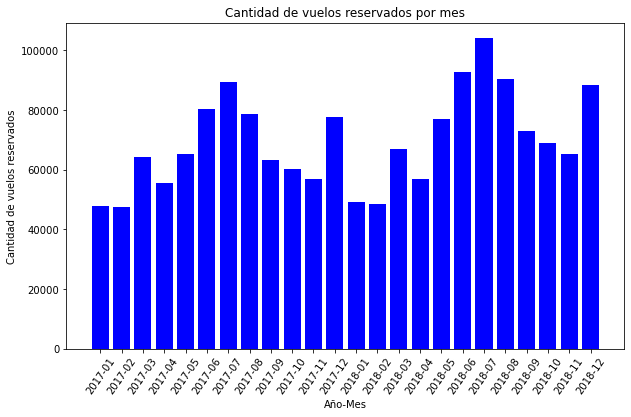

In [180]:
#crear el gráfico ordenando los meses
plt.figure(figsize=(10, 6))
plt.bar(vuelos_mes.index, vuelos_mes_ordenado['flights_booked'], color='blue')
plt.title('Cantidad de vuelos reservados por mes')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.xticks(vuelos_mes.index, labels=vuelos_mes['year_month'], rotation=55)
plt.show()

***4. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?***

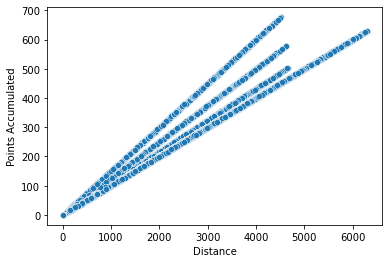

In [161]:
sns.scatterplot(x = "distance", 
                y = "points_accumulated", 
                data = df)

# cambiamos los nombres de los ejes
plt.xlabel("Distance")
plt.ylabel("Points Accumulated");

bien***5. ¿Cuál es la distribución de los clientes por provincia o estado***

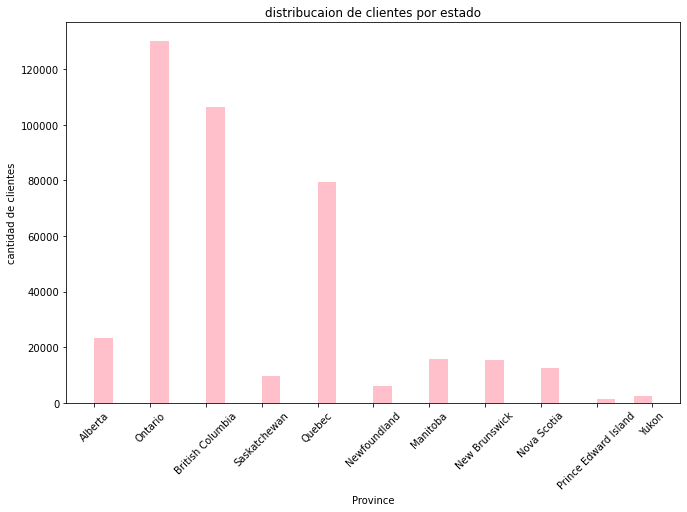

In [164]:


# grafica de la distribución de clientes por estado
plt.figure(figsize=(11,7))
plt.hist(x = "province", 
         data = df, 
         bins = 30, 
         color = "pink")
plt.title("distribucaion de clientes por estado")
plt.xlabel("Province")
plt.ylabel("cantidad de clientes")
plt.xticks(rotation=45)
plt.show()


In [165]:
#Vemos que la mayor cantidad de clientes está en Quebec, Ontario y Britis_columbia. Coincide con los tres estados más poblados de Canadá

***6. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los
clientes?***

In [184]:
#juntamos los datos por nivel educativo y calculamos el salario promedio para cada grupo
salario_promedio_por_educacion = df.groupby('education')['salary'].mean().reset_index()



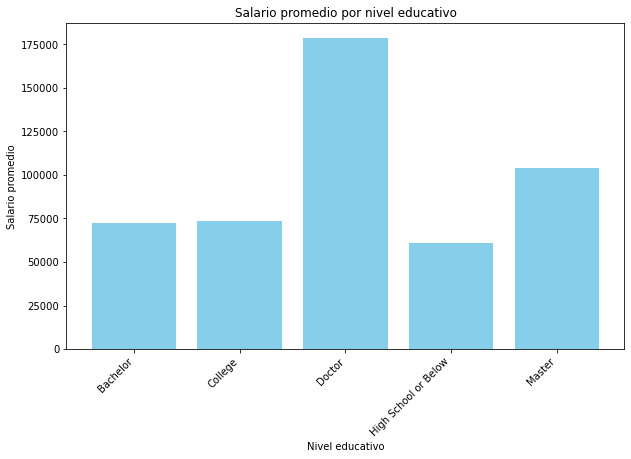

In [185]:
#ver grafica
plt.figure(figsize=(10, 6))
plt.bar(salario_promedio_por_educacion['education'], 
        salario_promedio_por_educacion['salary'], 
        color='skyblue')
plt.title('Salario promedio por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

In [168]:
#Niveles educativos más altos, como doctorados y máster, tienen salarios promedio más elevados. Los salarios más bajos se dan entre los 
#clientes con menor nivel educativo

bien***7. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad***

In [170]:
df["loyalty_card"].unique()


array(['Aurora', 'Nova', 'Star'], dtype=object)

In [171]:
#calcular el porcentaje
porcentaje = df.groupby("loyalty_card")["loyalty_number"].count().reset_index()
porcentaje

,loyalty_card,loyalty_number
0,Aurora,83132
1,Nova,136883
2,Star,183745


In [172]:
#colores que vamos a usar ( tantos como datos )
colores=["c", "cadetblue","seagreen", "teal", "turquoise"]

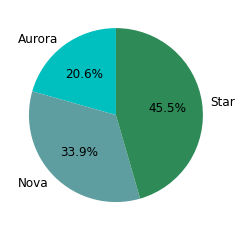

In [188]:
# creamos el grgafico con los datos del dataframe de arriba 
plt.pie("loyalty_number", 
        labels= "loyalty_card",
        data = porcentaje, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 12}, 
        startangle=90);


In [ ]:
#la tarjeta más común entre los clientes es la 'star'. La tarjeta 'aurora' es la menos frecuente.



bien***8. ¿Cómo se distribuyen los clientes según su estado civil y género?***

In [ ]:
#valores unicos 
df["marital_status"].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [ ]:
#valores unicos
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

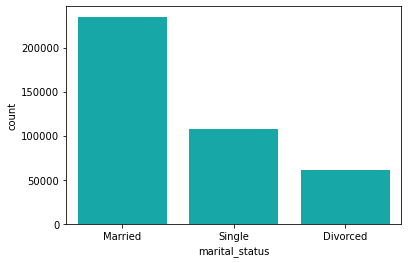

In [ ]:
#creamos una primera grafica, para luego unir la segunda
sns.countplot(x = "marital_status", 
              data = df,
              color = "c", )

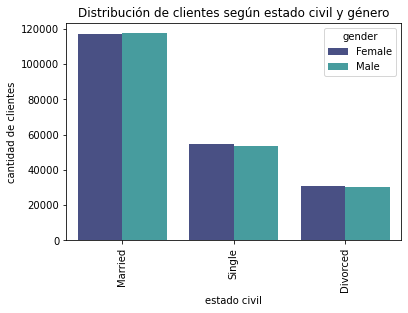

In [ ]:
sns.countplot(x = "marital_status", 
              data = df, 
              palette = "mako", 
              order = ['Married', 'Single', 'Divorced'], 
              hue = "gender")
plt.xticks(rotation = 90)
plt.title('Distribución de clientes según estado civil y género')
plt.xlabel("estado civil")
plt.ylabel("cantidad de clientes"); 


***Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
Objetivo del Ejercicio:
Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:***



9. Preparación de Datos:

-Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.

In [ ]:
#dataframe de las dos columnas que nos piden
df_datos = df[["flights_booked", "education"]]
df_datos

,flights_booked,education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor
...,...,...
403755,0,College
403756,0,Doctor
403757,3,Bachelor
403758,0,College


10. Análisis Descriptivo:

- Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [ ]:
#valores unicos Education
df_datos["education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [ ]:
#Aarupamos los datos por la columna education y calculamos la estadisticas descriptivas de fligth booked
estadistica = df_datos.groupby("education")["flights_booked"].describe()
estadistica


,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


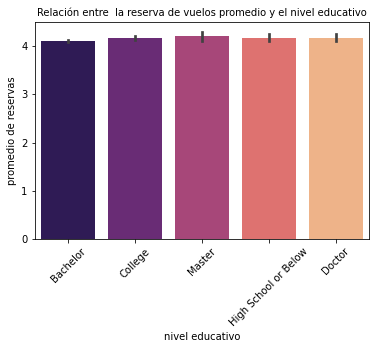

In [ ]:
sns.barplot(x = "education", 
               y = "flights_booked", 
               data = df_datos,
               palette = "magma")


plt.xlabel("nivel educativo")
plt.ylabel("promedio de reservas")
plt.xticks(rotation = 45)
plt.title("Relación entre  la reserva de vuelos promedio y el nivel educativo", fontsize = 10);

In [ ]:
# simple vista, no parecen existir grandes diferencias en los promedios de reservas. Aunque sí se observa una gran diferencia entre media y 
# mediana,lo que puede indicar la presencia de outliers, que modifiquen esa media.

10. Prueba Estadística:

Realiza una prueba de A/B testing para determinar si existe una diferencia 
significativa en el número de vuelos reservados entre los diferentes niveles 
educativos

In [ ]:
def tasa_conversion(df_datos, nivel_estudio): 
    # filtramos el DataFrame por el grupo educativo
    grupo = df_datos[df_datos["education"] == nivel_estudio]

    # calculamos la tasa de conversion
    conversion = grupo["flights_booked"].sum() / grupo["flights_booked"].count()

    return conversion

grupos_educativos = ["Bachelor", "College", "Doctor", "Master", "High School or Below"]

for grupo in grupos_educativos:
    conversion = tasa_conversion(df_datos, grupo)
    print(f"tasa de conversión para el grupo educativo {grupo}: {conversion}")

Tasa de conversión para el grupo educativo Bachelor: 4.11028756725938
Tasa de conversión para el grupo educativo College: 4.169743790338353
Tasa de conversión para el grupo educativo Doctor: 4.175511815464441
Tasa de conversión para el grupo educativo Master: 4.200699926751851
Tasa de conversión para el grupo educativo High School or Below: 4.176209357652657


In [ ]:
#CONCLUIMOS: que no hay evidencia suficiente para concluir que hay una diferencia significativa en el número de vuelos reservados entre
#  los diferentes niveles educativos. DESDE QUE SACAMOS LA MEDIA POR CADA GRUPO EDUCATIVO PODEMOS OBSERVAR COMO SON MUY PARECIDAS TODAS ENTRE
#  ELLAS. LO QUE NOS HACE SOSPECHAR DESDES sU PRINCIPIO QUE NO HAY DIFERENTECIA SIGNIFICATIVA, DESPUES LO CMPROBAMOS CON LA GRAFICA